### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


Data Exploration to gain insight about the dataset we are dealing with

In [1]:
# PYTHON MODULES 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [2]:
# LOAD, STORE DATASET IN stroop_df
stroop_df = pd.read_csv('stroopdata.csv')

In [3]:
# FIRST ROWS OF OUR DATA
stroop_df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [4]:
# NUMBERS OF ROWS AND COLUMNS
stroop_df.shape

(24, 2)

In [5]:
# VARIABLES TYPES 
stroop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [6]:
# CHECK FOR DUPLICATED 
stroop_df.duplicated(keep='first').sum()

0

In [7]:
# CHECK FOR NULL
stroop_df.isnull().sum()

Congruent      0
Incongruent    0
dtype: int64

(1) What is the independent variable? What is the dependent variable?
> Independent variable will be the type of test - congruent or incongruent

> Dependent variable will be the time it takes candidates to responds

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

Lets assume that we are dealing with a data that is normally distributed. We expect to perform a One Sample paired t-Test where each subject or entity is measured twice, resulting in pairs of observations.

- Our sample size is less than 30 or n = 24 < 30.
- Each subject or entity are asked to perform both task (congruent and incongruent)

Our hypothesis will be:

$$ H_0: t_{incongruent} = t_{congruent} $$

$$ H_a: t_{incongruent} > t_{congruent} $$

- The null hypothesis (H0) is that the mean of the population reaction time of the task under the incongruent words condition is not significantly different than that of the congruent words condition.

- The alternative hypothesis (Ha) is that the mean of the population reaction time of the task under the incongruent words condition is significantly different that of the congruent words condition.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [8]:
# Perform the analysis here
# STATS
stroop_df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


> Congruent:
- mean = 14.05
- standard deviation = 3.55

> Incongruent:
- mean = 22.01
- standard deviation = 4.797

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

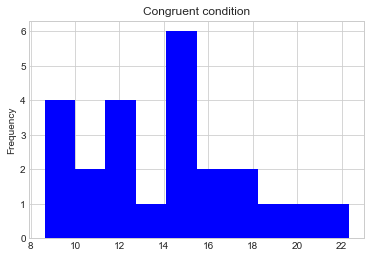

In [11]:
# Build the visualizations here
# CONGURENT TASK
sns.set_style('whitegrid')
plt.hist(stroop_df['Congruent'], color='blue'); 
plt.title("Congruent condition");
plt.ylabel("Frequency");

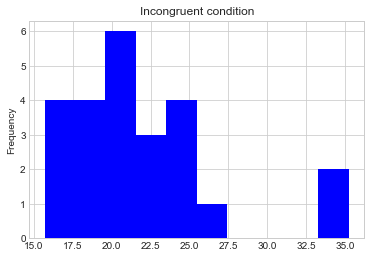

In [13]:
# INCONGRUENT TASK
sns.set_style('whitegrid')
plt.hist(stroop_df['Incongruent'], color='blue'); 
plt.title("Incongruent condition");
plt.ylabel("Frequency");

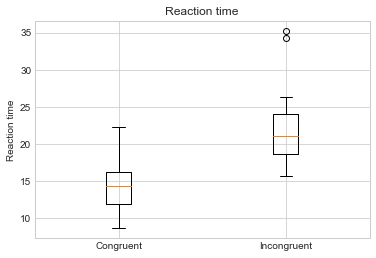

In [14]:
# BOXPLOT
sns.set_style('whitegrid')
plt.boxplot((stroop_df['Congruent'],stroop_df['Incongruent']), labels=("Congruent","Incongruent"));
plt.ylabel("Reaction time");
plt.title("Reaction time");

- There is a significantly different ranges.
- There is a significantly different median.
- The reaction time for the incongruent task seens right skewed.
- The reaction time for the incongruent task appears with an outlier on the right.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [18]:
# Perform the statistical test here
# TO DO
# 1 - AVG OR MEAN FOR EACH TASK
avg_congurent = stroop_df.Congruent.mean()
avg_incongurant = stroop_df.Incongruent.mean()

# 2 - MEAN DIFF
avg_diff = avg_congurent - avg_incongurant

# 3 - FIND SQUARE OF SUMS OF DIFF FOR SAMPLE MAEN
square_s = sum( ( (stroop_df.Congruent - stroop_df.Incongruent) - avg_diff ) ** 2  )

# 4 - FIND VARIANCE
var_diff = square_s / stroop_df.shape[0] - 1

# 5 - FIND STD
square_s = var_diff ** (1/2)

#  6 - T-STATISTICS
tstatistic = avg_diff / ( square_s / ( 24 ** (1/2) ) )

# 7 - FIND DEGREE 0F FREEDOM ROWS - 1
df = stroop_df.shape[0] - 1

# 8 - 99% conf level
alpha = 0.005
tcritical = stats.t.ppf(q=alpha, df=23)

In [19]:
print("Degrees of Freedom : ", df)
print("t-critical values : ", -tcritical, tcritical)
print("t-Statistic : ", tstatistic)

Degrees of Freedom :  23
t-critical values :  2.8073356837675236 -2.8073356837675236
t-Statistic :  -8.380039110954515


The calculated t-statistic is greater than the critical t-value, allowing to conclude that there is a statistically significant difference between the reaction time in the scores for both task. Therefore, we reject the null hypothesis with a 99% confident level.

The results macthed up my expectations that there is a statistically significant difference in the scores for both tasks.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Simply put, the Stroop effect shows how the brain processes words and colours differently. The uses of words on there own have a much stronger influence over a person's ability to say the colour. The interference that occurs between the different information received by the brain causes a conflict to occur.
Below two theories abuot the stroop effect:
- Speed of Processing Theory: the interference occurs because the brean reads faster than it recognizes colors.
- Selective Attention Theory: the interference occurs because recognizing of colors requires more attention than reading words.

Warped words. For example, the warped words Stroop effect produces the same findings similar to the original Stroop effect.The idea here is the way the words are printed slows down both the brain's reaction and processing time, making it harder to complete the task.